In [1]:
# Import the machine learning libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape
from keras import regularizers
from tensorflow.keras.optimizers import SGD

Using TensorFlow backend.


In [2]:
# Load the MNIST dataset.
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Scales the training and test data to range between 0 and 1.
max_value = float(X_train.max())
print(max_value)
X_train = X_train.astype('float32') / max_value
X_test = X_test.astype('float32') / max_value

11493376/11490434 [==============================] - 0s 0us/step
255.0


In [3]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


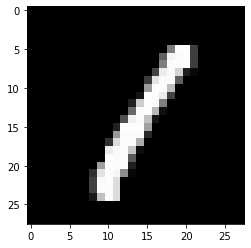

In [4]:
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))

In [5]:
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(60000, 784) (10000, 784) (60000,) (10000,)


### **Simple AutoEncoder**

In [6]:
# input dimension = 784
input_dim = X_train.shape[1]
encoding_dim = 32

compression_factor = float(input_dim) / encoding_dim
print("Compression factor: %s" % compression_factor)

autoencoder = Sequential()
autoencoder.add(Dense(encoding_dim, input_shape=(input_dim,), activation='relu'))
autoencoder.add(Dense(input_dim, activation='sigmoid'))

autoencoder.summary()

Compression factor: 24.5
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [7]:
# Extract the encoder model from the first layer of the autoencoder model.
input_img = Input(shape=(input_dim,))
encoder_layer = autoencoder.layers[0]
encoder = Model(input_img, encoder_layer(input_img))

encoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                25120     
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________


In [8]:
%%time
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(X_train, X_train, epochs=50, batch_size=256, shuffle=True, validation_data=(X_test, X_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 42us/step - loss: 0.2758 - val_loss: 0.1827
Epoch 2/50
60000/60000 [==============================] - 2s 38us/step - loss: 0.1658 - val_loss: 0.1502
Epoch 3/50
60000/60000 [==============================] - 2s 37us/step - loss: 0.1420 - val_loss: 0.1321
Epoch 4/50
60000/60000 [==============================] - 2s 36us/step - loss: 0.1275 - val_loss: 0.1206
Epoch 5/50
60000/60000 [==============================] - 2s 36us/step - loss: 0.1177 - val_loss: 0.1126
Epoch 6/50
60000/60000 [==============================] - 2s 36us/step - loss: 0.1107 - val_loss: 0.1066
Epoch 7/50
60000/60000 [==============================] - 2s 37us/step - loss: 0.1055 - val_loss: 0.1022
Epoch 8/50
60000/60000 [==============================] - 2s 36us/step - loss: 0.1017 - val_loss: 0.0989
Epoch 9/50
60000/60000 [==============================] - 2s 37us/step - loss: 0.0990 - val_loss: 0.0967
Epoch

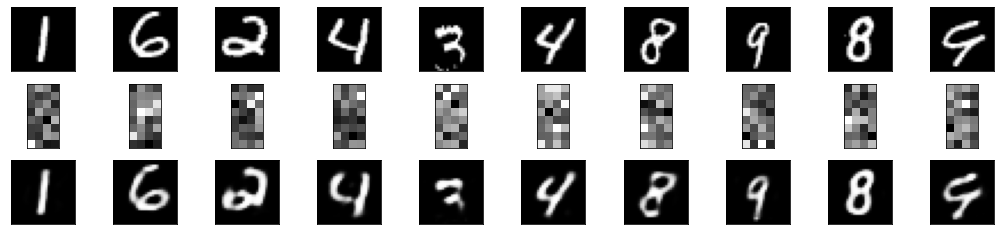

In [9]:
num_images = 10
np.random.seed(42)
random_test_images = np.random.randint(X_test.shape[0], size=num_images)

encoded_imgs = encoder.predict(X_test)
decoded_imgs = autoencoder.predict(X_test)

plt.figure(figsize=(18, 4))

for i, image_idx in enumerate(random_test_images):
    # plot original image
    ax = plt.subplot(3, num_images, i + 1)
    plt.imshow(X_test[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # plot encoded image
    ax = plt.subplot(3, num_images, num_images + i + 1)
    plt.imshow(encoded_imgs[image_idx].reshape(8, 4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # plot reconstructed image
    ax = plt.subplot(3, num_images, 2*num_images + i + 1)
    plt.imshow(decoded_imgs[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### **Deep AutoEncoder**

In [10]:
autoencoder = Sequential()

# Encoder Layers
autoencoder.add(Dense(4 * encoding_dim, input_shape=(input_dim,), activation='relu'))
autoencoder.add(Dense(2 * encoding_dim, activation='relu'))
autoencoder.add(Dense(encoding_dim, activation='relu'))

# Decoder Layers
autoencoder.add(Dense(2 * encoding_dim, activation='relu'))
autoencoder.add(Dense(4 * encoding_dim, activation='relu'))
autoencoder.add(Dense(input_dim, activation='sigmoid'))

autoencoder.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_7 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_8 (Dense)              (None, 784)               101136    
Total params: 222,384
Trainable params: 222,384
Non-trainable params: 0
________________________________________________

In [11]:
# Extract the encoder model from the autoencoder.
input_img = Input(shape=(input_dim,))
encoder_layer1 = autoencoder.layers[0]
encoder_layer2 = autoencoder.layers[1]
encoder_layer3 = autoencoder.layers[2]
encoder = Model(input_img, encoder_layer3(encoder_layer2(encoder_layer1(input_img))))

encoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
Total params: 110,816
Trainable params: 110,816
Non-trainable params: 0
_________________________________________________________________


In [12]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(X_train, X_train, epochs=50, batch_size=256, validation_data=(X_test, X_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 4s 62us/step - loss: 0.2502 - val_loss: 0.1732
Epoch 2/50
60000/60000 [==============================] - 3s 58us/step - loss: 0.1566 - val_loss: 0.1397
Epoch 3/50
60000/60000 [==============================] - 3s 58us/step - loss: 0.1339 - val_loss: 0.1264
Epoch 4/50
60000/60000 [==============================] - 3s 58us/step - loss: 0.1240 - val_loss: 0.1193
Epoch 5/50
60000/60000 [==============================] - 3s 58us/step - loss: 0.1180 - val_loss: 0.1142
Epoch 6/50
60000/60000 [==============================] - 3s 57us/step - loss: 0.1139 - val_loss: 0.1108
Epoch 7/50
60000/60000 [==============================] - 4s 60us/step - loss: 0.1109 - val_loss: 0.1082
Epoch 8/50
60000/60000 [==============================] - 3s 58us/step - loss: 0.1081 - val_loss: 0.1054
Epoch 9/50
60000/60000 [==============================] - 3s 57us/step - loss: 0.1056 - val_loss: 0.1032
Epoch

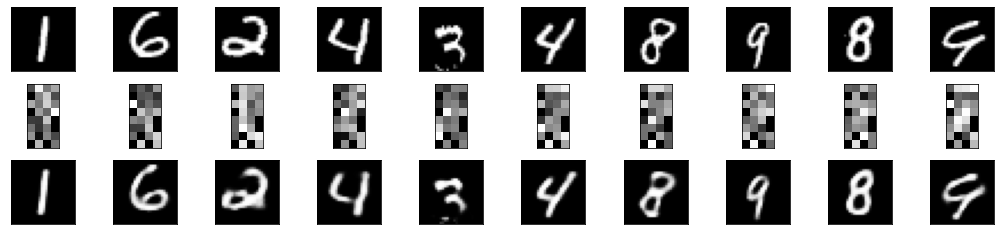

In [13]:
num_images = 10
np.random.seed(42)
random_test_images = np.random.randint(X_test.shape[0], size=num_images)

encoded_imgs = encoder.predict(X_test)
decoded_imgs = autoencoder.predict(X_test)

plt.figure(figsize=(18, 4))

for i, image_idx in enumerate(random_test_images):
    # plot original image
    ax = plt.subplot(3, num_images, i + 1)
    plt.imshow(X_test[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # plot encoded image
    ax = plt.subplot(3, num_images, num_images + i + 1)
    plt.imshow(encoded_imgs[image_idx].reshape(8, 4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # plot reconstructed image
    ax = plt.subplot(3, num_images, 2*num_images + i + 1)
    plt.imshow(decoded_imgs[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### **Convolutional AutoEncoder**

In [0]:
X_train = X_train.reshape((len(X_train), 28, 28, 1))
X_test = X_test.reshape((len(X_test), 28, 28, 1))

In [15]:
autoencoder = Sequential()

# Encoder Layers
autoencoder.add(Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=X_train.shape[1:]))
autoencoder.add(MaxPooling2D((2, 2), padding='same'))
autoencoder.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
autoencoder.add(MaxPooling2D((2, 2), padding='same'))
autoencoder.add(Conv2D(8, (3, 3), strides=(2,2), activation='relu', padding='same'))

# Flatten encoding for visualization
autoencoder.add(Flatten())
autoencoder.add(Reshape((4, 4, 8)))

# Decoder Layers
autoencoder.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(16, (3, 3), activation='relu'))
autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(1, (3, 3), activation='sigmoid', padding='same'))

autoencoder.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 8)           584       
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)               0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 4, 4, 8)          

In [16]:
# Extract the encoder model from the autoencoder.
encoder = Model(inputs=autoencoder.input, outputs=autoencoder.get_layer('flatten_1').output)
encoder.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1_input (InputLayer)  (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 8)           584       
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)               0   

In [17]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(X_train, X_train, epochs=100, batch_size=128, validation_data=(X_test, X_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 92s 2ms/step - loss: 0.2145 - val_loss: 0.1399
Epoch 2/100
60000/60000 [==============================] - 92s 2ms/step - loss: 0.1290 - val_loss: 0.1191
Epoch 3/100
60000/60000 [==============================] - 92s 2ms/step - loss: 0.1162 - val_loss: 0.1108
Epoch 4/100
60000/60000 [==============================] - 93s 2ms/step - loss: 0.1100 - val_loss: 0.1064
Epoch 5/100
60000/60000 [==============================] - 93s 2ms/step - loss: 0.1062 - val_loss: 0.1043
Epoch 6/100
60000/60000 [==============================] - 92s 2ms/step - loss: 0.1036 - val_loss: 0.1015
Epoch 7/100
60000/60000 [==============================] - 93s 2ms/step - loss: 0.1015 - val_loss: 0.0994
Epoch 8/100
60000/60000 [==============================] - 93s 2ms/step - loss: 0.0998 - val_loss: 0.0980
Epoch 9/100
60000/60000 [==============================] - 92s 2ms/step - loss: 0.0984 - val_loss: 0.0

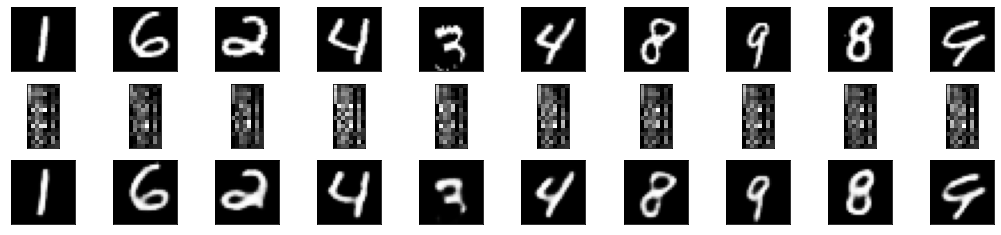

In [18]:
num_images = 10
np.random.seed(42)
random_test_images = np.random.randint(X_test.shape[0], size=num_images)

encoded_imgs = encoder.predict(X_test)
decoded_imgs = autoencoder.predict(X_test)

plt.figure(figsize=(18, 4))

for i, image_idx in enumerate(random_test_images):
    # plot original image
    ax = plt.subplot(3, num_images, i + 1)
    plt.imshow(X_test[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # plot encoded image
    ax = plt.subplot(3, num_images, num_images + i + 1)
    plt.imshow(encoded_imgs[image_idx].reshape(16, 8))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # plot reconstructed image
    ax = plt.subplot(3, num_images, 2*num_images + i + 1)
    plt.imshow(decoded_imgs[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### **Denoising Images with the Convolutional AutoEncoder**

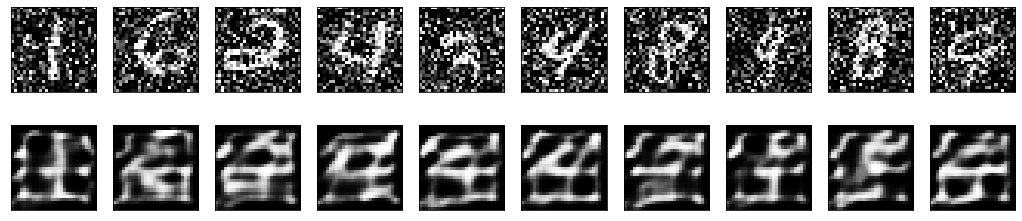

In [19]:
X_train_noisy = X_train + np.random.normal(loc=0.0, scale=0.5, size=X_train.shape)
X_train_noisy = np.clip(X_train_noisy, 0., 1.)

X_test_noisy = X_test + np.random.normal(loc=0.0, scale=0.5, size=X_test.shape)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)

num_images = 10
np.random.seed(42)
random_test_images = np.random.randint(X_test.shape[0], size=num_images)

# Denoise test images
X_test_denoised = autoencoder.predict(X_test_noisy)

plt.figure(figsize=(18, 4))

for i, image_idx in enumerate(random_test_images):
    # plot original image
    ax = plt.subplot(2, num_images, i + 1)
    plt.imshow(X_test_noisy[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # plot reconstructed image
    ax = plt.subplot(2, num_images, num_images + i + 1)
    plt.imshow(X_test_denoised[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### **Convolutioinal AutoEncoder**

In [20]:
autoencoder = Sequential()

# Encoder Layers
autoencoder.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=X_train.shape[1:]))
autoencoder.add(MaxPooling2D((2, 2), padding='same'))
autoencoder.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
autoencoder.add(MaxPooling2D((2, 2), padding='same'))

# Decoder Layers
autoencoder.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(1, (3, 3), activation='sigmoid', padding='same'))

autoencoder.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 7, 7, 32)          9248      
_________________________________________________________________
up_sampling2d_4 (UpSampling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 32)       

In [21]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(X_train_noisy, X_train, epochs=100, batch_size=128, validation_data=(X_test_noisy, X_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 163s 3ms/step - loss: 0.1658 - val_loss: 0.1204
Epoch 2/100
60000/60000 [==============================] - 164s 3ms/step - loss: 0.1150 - val_loss: 0.1095
Epoch 3/100
60000/60000 [==============================] - 165s 3ms/step - loss: 0.1086 - val_loss: 0.1054
Epoch 4/100
60000/60000 [==============================] - 167s 3ms/step - loss: 0.1054 - val_loss: 0.1034
Epoch 5/100
60000/60000 [==============================] - 171s 3ms/step - loss: 0.1034 - val_loss: 0.1013
Epoch 6/100
60000/60000 [==============================] - 166s 3ms/step - loss: 0.1018 - val_loss: 0.1001
Epoch 7/100
60000/60000 [==============================] - 166s 3ms/step - loss: 0.1008 - val_loss: 0.0998
Epoch 8/100
60000/60000 [==============================] - 164s 3ms/step - loss: 0.1000 - val_loss: 0.0986
Epoch 9/100
60000/60000 [==============================] - 170s 3ms/step - loss: 0.0992 - val_

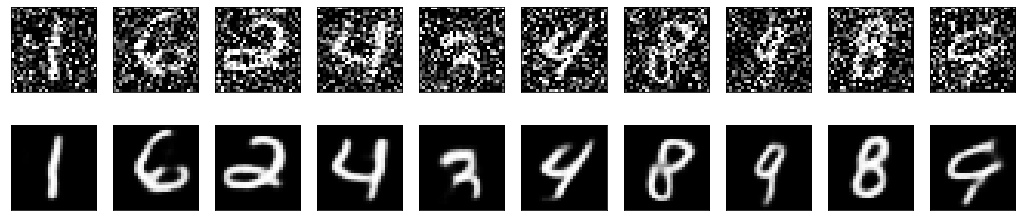

In [22]:
# Denoise test images
X_test_denoised = autoencoder.predict(X_test_noisy)

plt.figure(figsize=(18, 4))

for i, image_idx in enumerate(random_test_images):
    # plot original image
    ax = plt.subplot(2, num_images, i + 1)
    plt.imshow(X_test_noisy[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # plot reconstructed image
    ax = plt.subplot(2, num_images, num_images + i + 1)
    plt.imshow(X_test_denoised[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()